### Parse log file to obtain trading data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
log_file = 'data/simple_threshold.log'

with open(log_file, 'r') as f:
    lines = f.readlines()
    
    activity_start = 0
    while not lines[activity_start].startswith('Activities log:'):
        activity_start += 1
    activity_start += 1
    activity_end = activity_start + 1
    while lines[activity_end] != '\n':
        activity_end += 1

    trade_start = activity_end + 1
    while not lines[trade_start].startswith('Trade History:'):
        trade_start += 1
    trade_start += 1
    trade_end = len(lines)

    trade_history = ''.join(lines[trade_start:trade_end])

activity_start, activity_end, trade_start, trade_end

(10005, 14006, 14011, 25524)

In [3]:
activity_log = pd.read_csv(log_file, skiprows=activity_start, nrows=activity_end-activity_start-1, sep=';')
activity_log

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.000000
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.000000
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,2.000000
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,1.925293
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,2.134766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,2,10005.0,25.0,NaN,NaN,10001.0,1330.000000
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,-699.429688
3997,-2,199800,AMETHYSTS,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,1330.000000
3998,-2,199900,STARFRUIT,4950,32,NaN,NaN,NaN,NaN,4954,7,4956.0,32.0,NaN,NaN,4952.0,-695.953125


In [4]:
trade_history = pd.read_json(trade_history)
trade_history

/tmp/ipykernel_1003366/41968203.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  trade_history = pd.read_json(trade_history)


,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,,SUBMISSION,STARFRUIT,SEASHELLS,5002,1
1,0,,,STARFRUIT,SEASHELLS,5003,1
2,0,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
3,0,,,STARFRUIT,SEASHELLS,5003,13
4,0,,,AMETHYSTS,SEASHELLS,10004,1
...,...,...,...,...,...,...,...
1274,199400,,,STARFRUIT,SEASHELLS,4950,2
1275,199400,,,STARFRUIT,SEASHELLS,4950,1
1276,199500,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
1277,199600,,,AMETHYSTS,SEASHELLS,10002,2


In [5]:
market_trades = trade_history[(trade_history.buyer == '') & (trade_history.seller == '')]
market_trades

,timestamp,buyer,seller,symbol,currency,price,quantity
1,0,,,STARFRUIT,SEASHELLS,5003,1
3,0,,,STARFRUIT,SEASHELLS,5003,13
4,0,,,AMETHYSTS,SEASHELLS,10004,1
5,1100,,,AMETHYSTS,SEASHELLS,9996,2
8,1700,,,AMETHYSTS,SEASHELLS,10002,1
...,...,...,...,...,...,...,...
1273,199400,,,STARFRUIT,SEASHELLS,4950,3
1274,199400,,,STARFRUIT,SEASHELLS,4950,2
1275,199400,,,STARFRUIT,SEASHELLS,4950,1
1277,199600,,,AMETHYSTS,SEASHELLS,10002,2


In [6]:
own_trades = trade_history[(trade_history.buyer == 'SUBMISSION') | (trade_history.seller == 'SUBMISSION')]
own_trades

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,,SUBMISSION,STARFRUIT,SEASHELLS,5002,1
2,0,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
6,1200,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
7,1300,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
10,1800,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
...,...,...,...,...,...,...,...
1253,196000,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,2
1257,197400,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
1263,198500,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,10
1265,198900,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1


### Visualize market trades and own trades

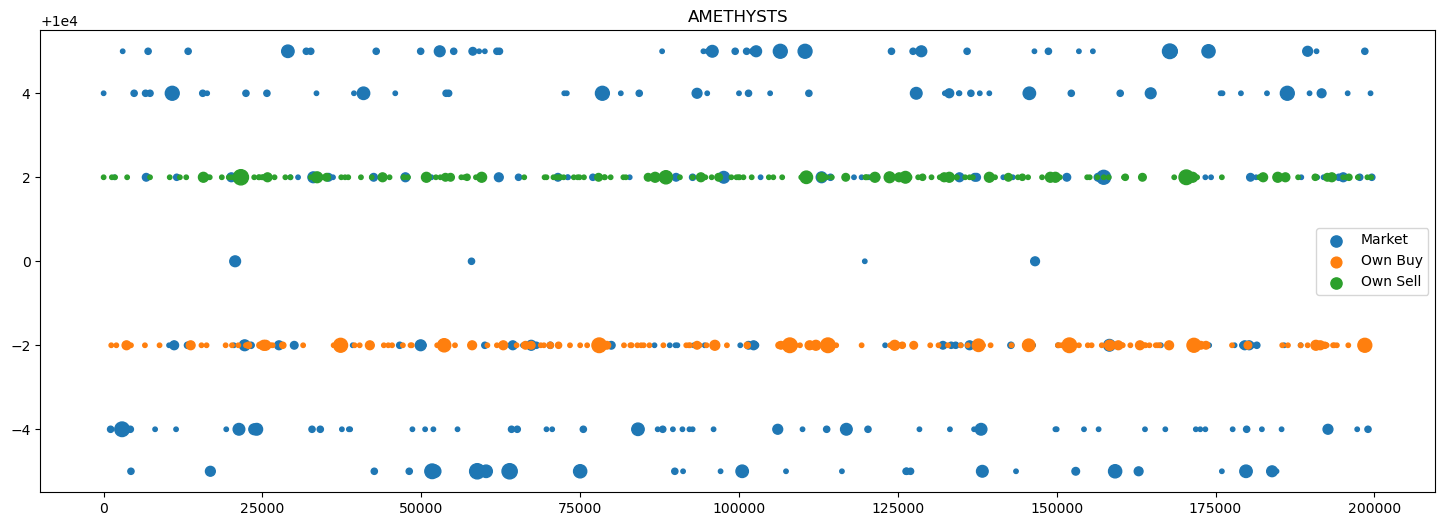

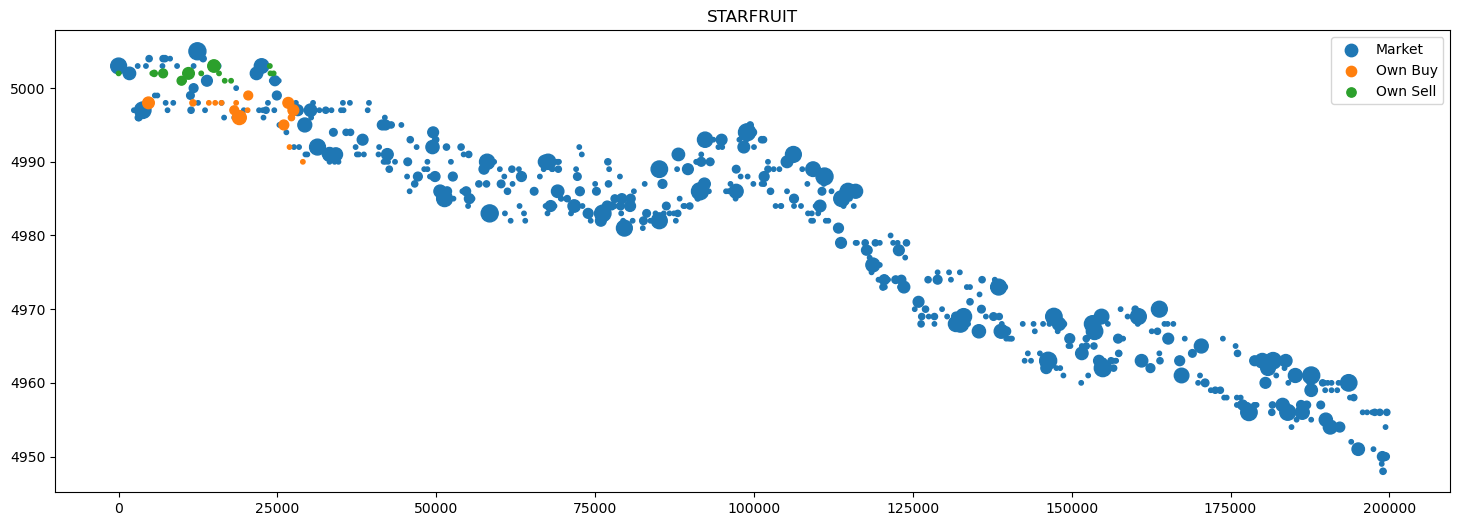

In [25]:
for symbol in ['AMETHYSTS', 'STARFRUIT']:
    market = market_trades[market_trades.symbol == symbol]
    own_buy = own_trades[(own_trades.symbol == symbol) & (own_trades.buyer == 'SUBMISSION')]
    own_sell = own_trades[(own_trades.symbol == symbol) & (own_trades.seller == 'SUBMISSION')]
    
    plt.figure(figsize=(18, 6))
    plt.scatter(market.timestamp, market.price, label='Market', s=10*market.quantity)
    plt.scatter(own_buy.timestamp, own_buy.price, label='Own Buy', s=10*own_buy.quantity)
    plt.scatter(own_sell.timestamp, own_sell.price, label='Own Sell', s=10*own_sell.quantity)
    plt.legend()
    plt.title(symbol)
    plt.show()